# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [2]:
!pip install -U seaborn #update

     |████████████████████████████████| 293 kB 40.9 MB/s            
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel('Online Retail.xlsx')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     540455 non-null  int64         
 2   InvoiceDate  540455 non-null  datetime64[ns]
 3   UnitPrice    540455 non-null  float64       
 4   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.7+ MB


In [10]:
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [7]:
def data_visualization(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['UnitPrice'], bins=50, kde=True)
    plt.title('Distribution of Unit Prices')
    plt.xlabel('Unit Price')
    plt.ylabel('Frequency')
    plt.show()

    # Example: Scatter plot of quantity vs. unit price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
    plt.title('Quantity vs. Unit Price')
    plt.xlabel('Quantity')
    plt.ylabel('Unit Price')
    plt.show()
    
    # Sales by month
    monthly_sales = df.groupby('Month').sum()['Quantity']
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='bar')
    plt.title('Monthly Sales')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity Sold')
    plt.show()

    # Sales by day of week
    daily_sales = df.groupby('DayOfWeek').sum()['Quantity']
    plt.figure(figsize=(10, 6))
    daily_sales.plot(kind='bar')
    plt.title('Sales by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Quantity Sold')
    plt.show()
    
    # Top-selling products
    top_products = df.groupby('Description').sum()['Quantity'].sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_products.plot(kind='bar')
    plt.title('Top 10 Selling Products')
    plt.xlabel('Product Description')
    plt.ylabel('Total Quantity Sold')
    plt.show()

    # Top-selling countries
    top_countries = df.groupby('Country').sum()['Quantity'].sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_countries.plot(kind='bar')
    plt.title('Top 10 Selling Countries')
    plt.xlabel('Country')
    plt.ylabel('Total Quantity Sold')
    plt.show()
    
    # Box plot for quantity
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['Quantity'])
    plt.title('Box Plot of Quantity Sold')
    plt.show()

    # Box plot for unit price
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['UnitPrice'])
    plt.title('Box Plot of Unit Prices')
    plt.show()


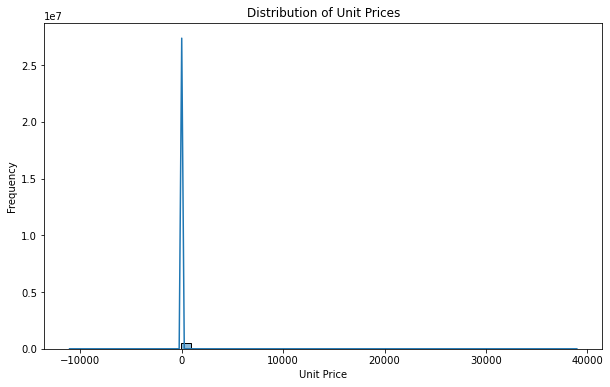

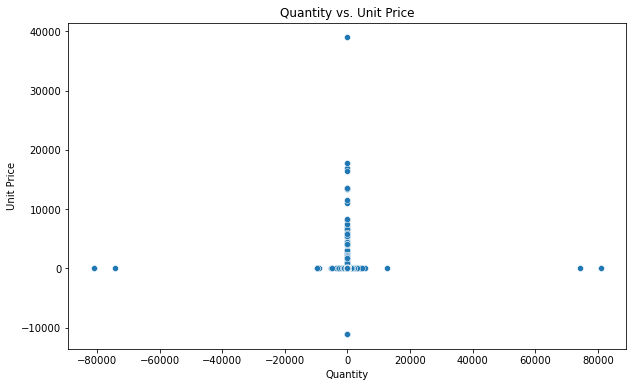

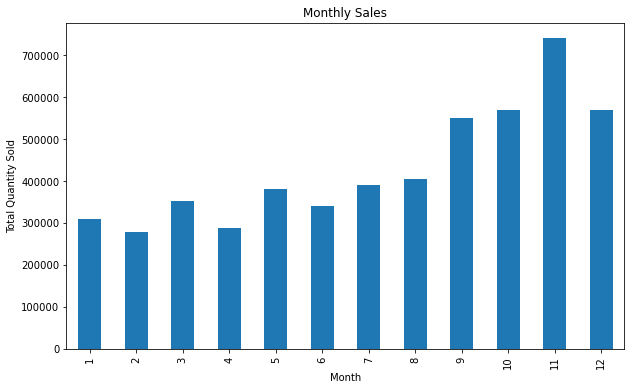

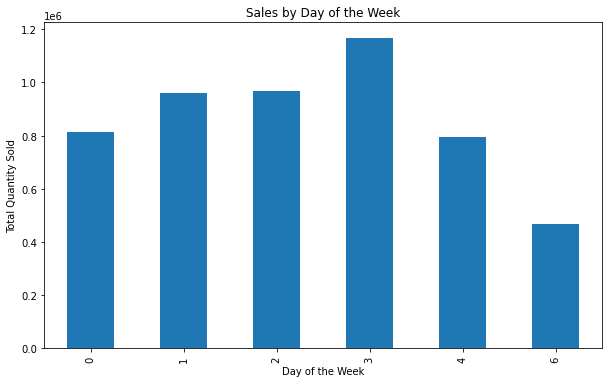

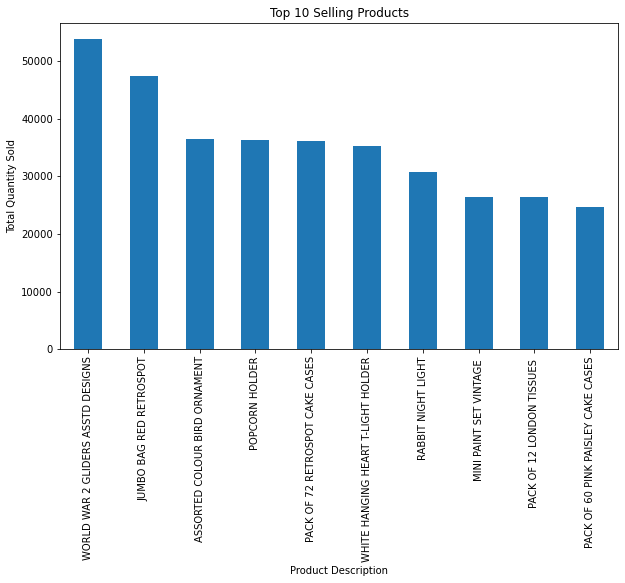

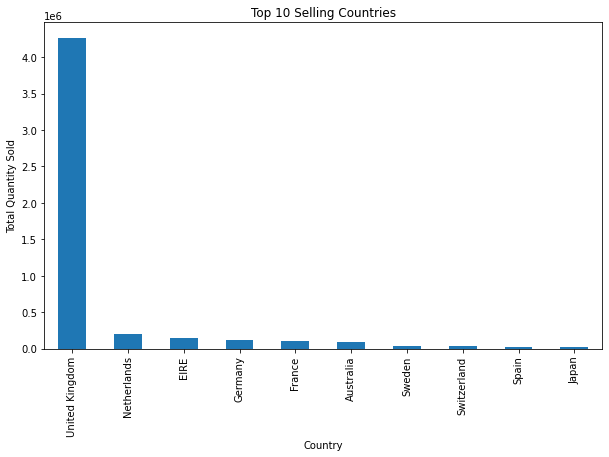

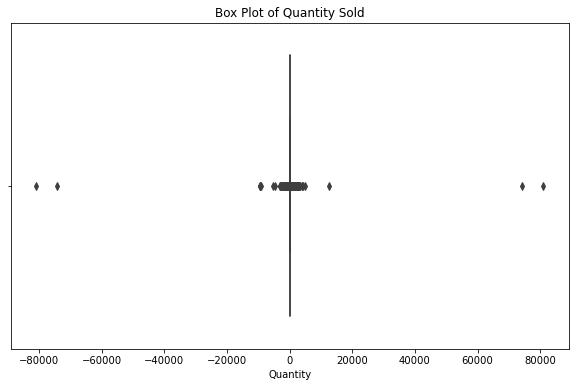

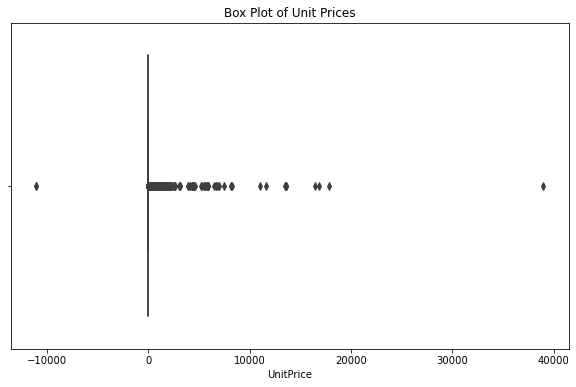

In [11]:
pattern = r'^[A-Z]$'
df[df['StockCode'].notna() & df['StockCode'].str.contains(pattern, regex=True)]['Description'].value_counts()

Manual             571
Discount            77
SAMPLES             63
Adjust bad debt      3
Name: Description, dtype: int64

In [12]:
uppercase_letters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
df_cleaned = df[~(df['StockCode'].notna() & df['StockCode'].isin(uppercase_letters))]

In [13]:
#df_cleaned = df_cleaned[df_cleaned['StockCode'] != 'AMAZONFEE']
df_cleaned = df_cleaned[~df_cleaned['StockCode'].isin(['AMAZONFEE', 'POST', 'DOT'])]
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Quantity'] <= 10000)]

In [14]:
df_cleaned = df_cleaned.dropna(subset=['Description'])

In [15]:
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2
...,...,...,...,...,...,...,...,...,...,...
528517,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,4
528518,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,4
528519,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4
528520,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,4


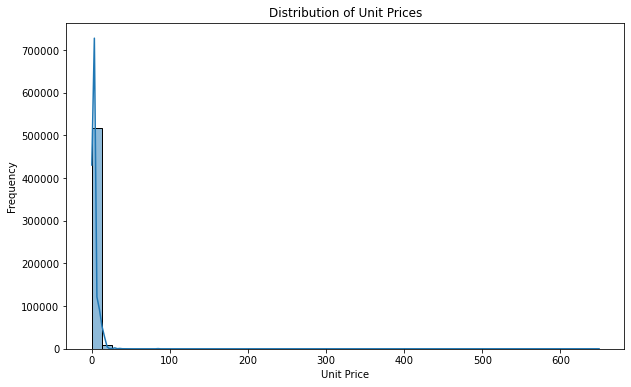

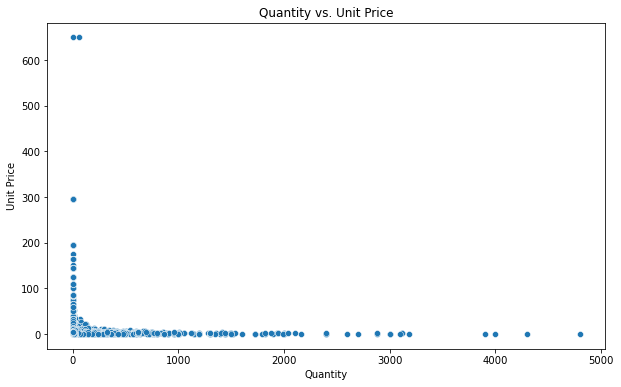

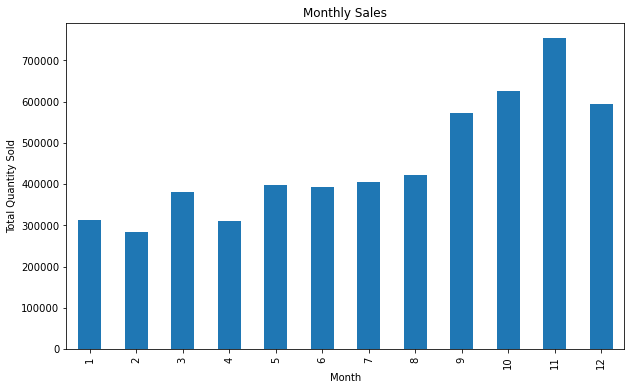

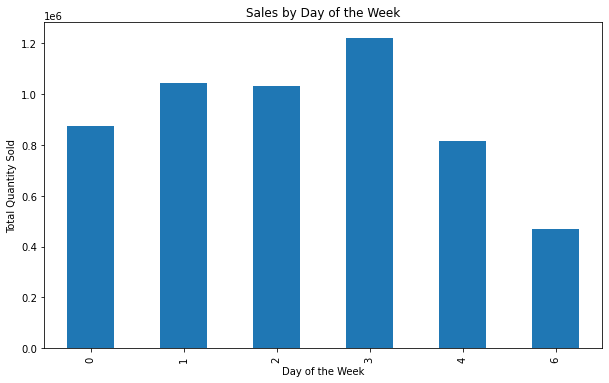

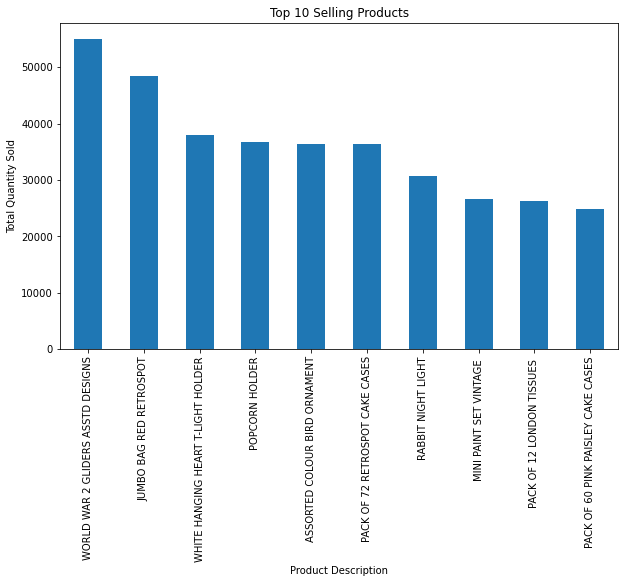

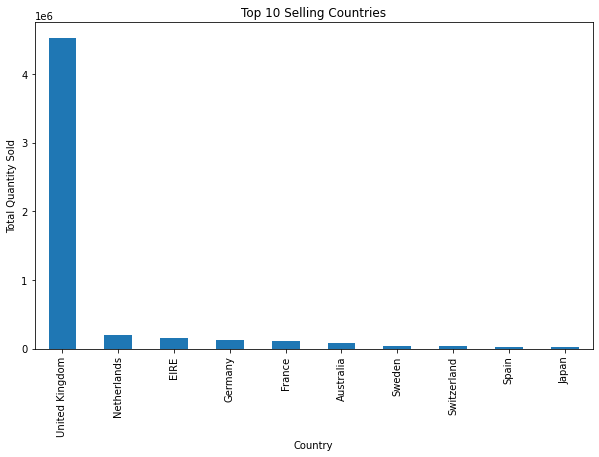

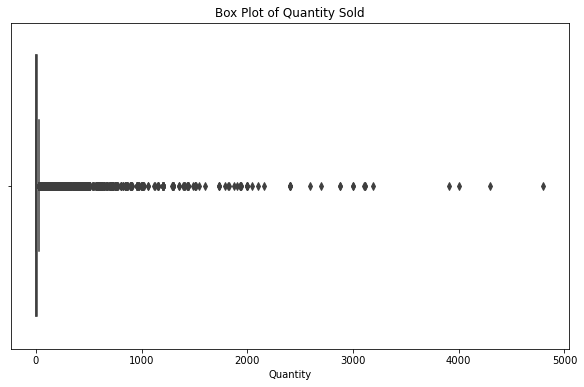

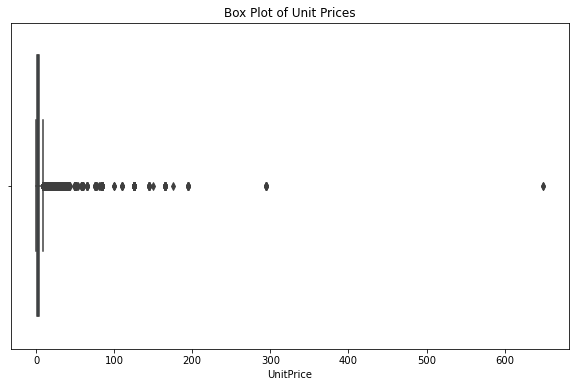

In [16]:
data_visualization(df_cleaned)

In [17]:
df_cleaned['Country'].value_counts()

United Kingdom          484642
Germany                   8659
France                    8102
EIRE                      7889
Spain                     2423
Netherlands               2326
Switzerland               1936
Belgium                   1935
Portugal                  1464
Australia                 1184
Norway                    1049
Channel Islands            747
Italy                      741
Finland                    647
Cyprus                     612
Unspecified                446
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     295
Hong Kong                  279
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon 

In [18]:
df_cleaned = df_cleaned.drop_duplicates()

In [19]:
df_cleaned['Country'].value_counts()

United Kingdom          479504
Germany                   8644
France                    8087
EIRE                      7878
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1455
Australia                 1183
Norway                    1049
Channel Islands            746
Italy                      741
Finland                    647
Cyprus                     601
Unspecified                442
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     292
Hong Kong                  275
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon 

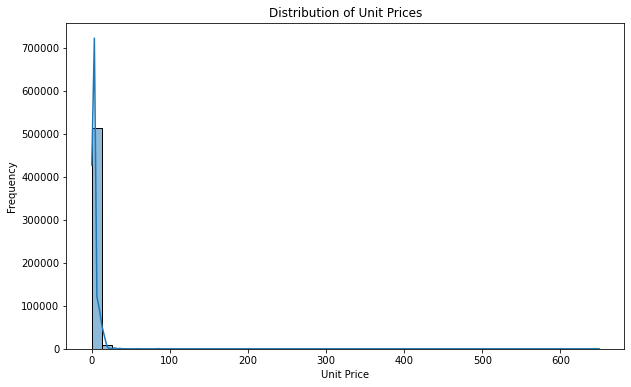

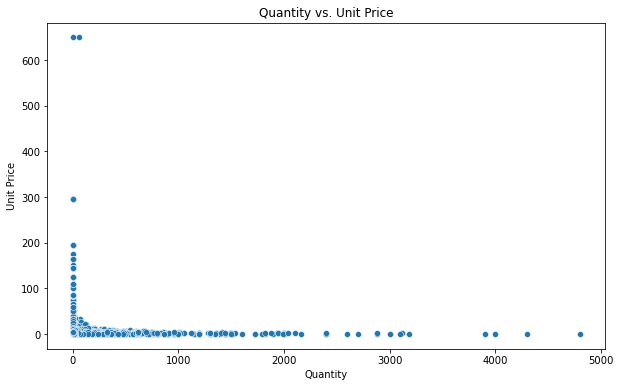

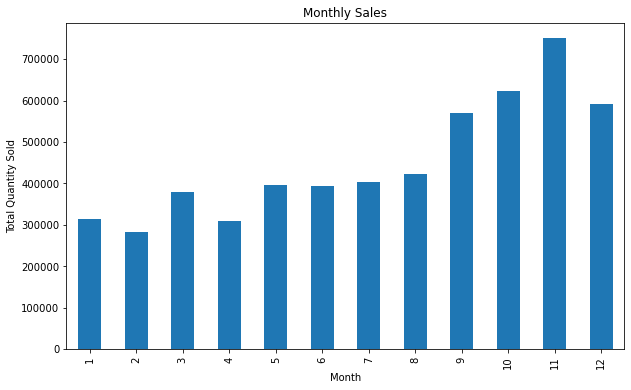

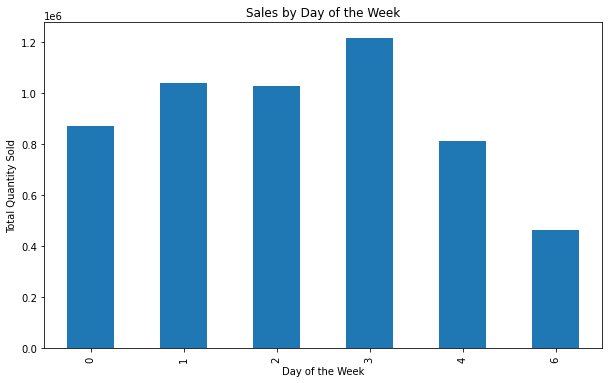

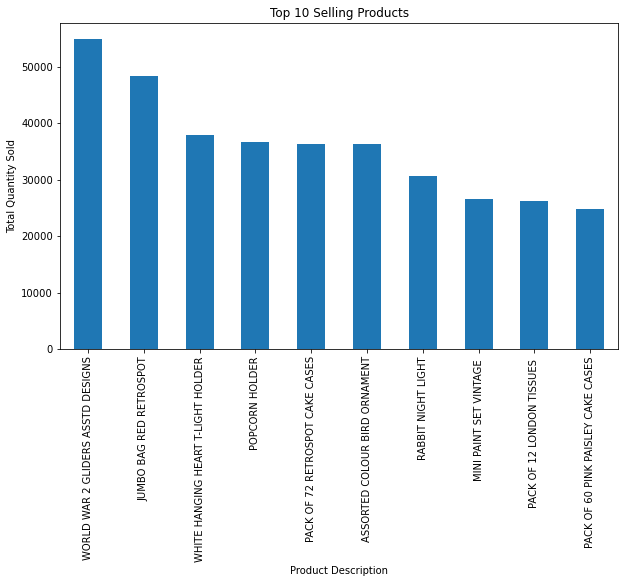

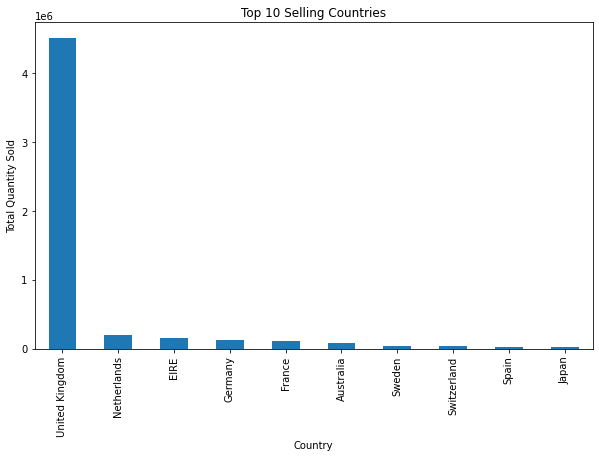

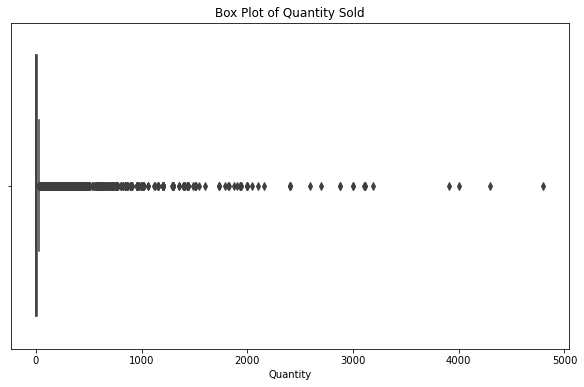

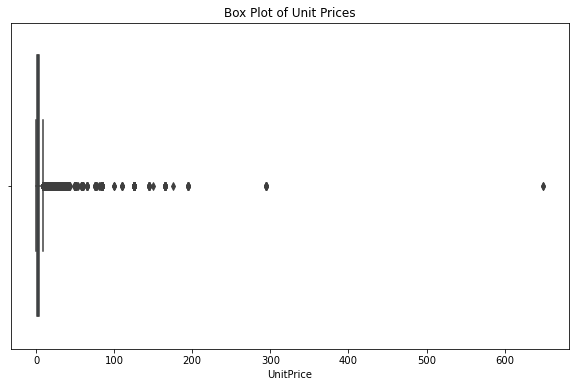

In [20]:
data_visualization(df_cleaned)